(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 784)
(10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0

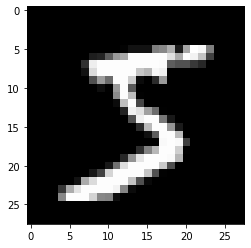

In [6]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


X_train[0].shape
plt.imshow(X_train[0],cmap='gray')

y_train[0]
image_height,image_weight =28,28
X_train = X_train.reshape(60000,image_height*image_weight)
X_test = X_test.reshape(10000,image_height*image_weight)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /+255.0
print(X_train[0])



In [7]:
print(y_train.shape)
print(y_test.shape)


(60000,)
(10000,)


In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)



(60000, 10)
(10000, 10)


In [9]:
model = Sequential()
model.add(Dense(512,activation='relu', input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))




In [11]:

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*512+512



401920

In [ ]:
512*512+512

262656

In [ ]:
512*10+10

5130

In [12]:
model.fit(X_train,y_train,epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3106 - accuracy: 0.9043 - val_loss: 21.3413 - val_accuracy: 0.9594
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 16.1358 - val_accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0536 - accuracy: 0.9830 - val_loss: 15.4773 - val_accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 18.0873 - val_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 14.5833 - val_accuracy: 0.9800


In [13]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 14.5833 - accuracy: 0.9800


In [14]:
score

[14.583250045776367, 0.9800000190734863]